## Gathering data

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy


#### Reading the twitter archive enhanced csv file.

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Reading the image predicitons tsv file using python's requests library.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

localfile = url.split('/')[-1]
with open(localfile, mode='wb') as file:
    file.write(response.content)

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Reading the twitter data using Twitter API (tweepy)

In [5]:
consumer_key = 'J0UThDBO9siolq9pfZmcssywF'
consumer_secret = 'Gl1Bn8rBO7ePznuUluN5Y7RnHRLuWfnrculT8sLu6knPDjrp7f'
access_token = '1155634178811146245-P7ONVnV63xjqt6iXC2N2yi3jO836VL'
access_secret = 'Ws32qLAgaHITsAhuaRQ3JN6yDxNaLfTMvCdzybRSZWcCN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = twitter_archive.tweet_id

tweet_ids.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

source: https://stackoverflow.com/questions/34379168/how-to-save-the-tweets-in-json-to-txt-file-in-python-3-4

In [7]:
Exception_list = []
with open('tweet_json.txt', 'w', encoding='utf-8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')        
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            Exception_list.append(tweet_id)
            print(e)

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status fou

In [4]:
tweet_json = pd.read_json('tweet_json.txt', orient='records', lines=True )

In [5]:
tweet_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [6]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37273,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7984,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32049,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5930,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24148,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3917,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40589,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38826,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8816,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
tweet_df = tweet_json[['id', 'retweet_count', 'favorite_count', 'retweeted', 'display_text_range']]

tweet_df = tweet_df.rename(columns={'id':'tweet_id'})

tweet_df.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7984,37273,False,"[0, 85]"
1,892177421306343426,5930,32049,False,"[0, 138]"
2,891815181378084864,3917,24148,False,"[0, 121]"
3,891689557279858688,8142,40589,False,"[0, 79]"
4,891327558926688256,8816,38826,False,"[0, 138]"


## Assessing data

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.duplicated().sum()

0

There are no duplicate values in this dataset.

In [11]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
twitter_archive.in_reply_to_status_id.head(35)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30    8.862664e+17
31             NaN
32             NaN
33             NaN
34             NaN
Name: in_reply_to_status_id, dtype: float64

In [13]:
twitter_archive.in_reply_to_user_id.head(35)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30    2.281182e+09
31             NaN
32             NaN
33             NaN
34             NaN
Name: in_reply_to_user_id, dtype: float64

In [14]:
twitter_archive.timestamp.dtype

dtype('O')

In [15]:
twitter_archive.text.sample()

1093    Everybody stop what you're doing and watch the...
Name: text, dtype: object

In [16]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
test = twitter_archive[twitter_archive.tweet_id.isin(image_predictions.tweet_id)]

len(test)

2075

This means there are several tweet_ids not present in image_prediction data.

In [21]:
twitter_archive.retweeted_status_id.notnull().sum()

181

This means there are 181 retweeted entries in this dataframe which should not be there.

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
image_predictions.tweet_id.duplicated().sum()

0

So there are no duplicate tweet ids in this dataframe.

In [26]:
image_predictions.jpg_url.duplicated().sum()

66

In [27]:
image_predictions.jpg_url.value_counts().head(15)

https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                       

All the jpg_urls having counts > 1 are duplicated/retweeted. Checking one of them to find the difference between both the entries.

In [28]:
image_predictions.query('jpg_url == "https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1380,765222098633691136,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True


In [29]:
twitter_archive.query('tweet_id == "765222098633691136"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
854,765222098633691136,NaN,NaN,2016-08-15 16:22:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gromit. He's pupset because there's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None


In [30]:
twitter_archive.query('tweet_id == "772615324260794368"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
800,772615324260794368,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gromit. He's pupset bec...,7.652221e+17,4.196984e+09,2016-08-15 16:22:20 +0000,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None


This dataframe contains tweets that were retweeted

In [31]:
image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


All of these columns have p1_dog, p2_dog & p3_dog values False which means the images in this entries aren't of dogs.

In [32]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 5 columns):
tweet_id              2333 non-null int64
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
retweeted             2333 non-null bool
display_text_range    2333 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.3+ KB


In [33]:
tweet_df.retweeted.value_counts()

False    2333
Name: retweeted, dtype: int64

None of the tweets were retweeted. This column is not needed in this dataframe.

### Summary

#### Quality Issues

**twitter archive dataframe**
1. Incorrect datatypes for in_reply_to_status_id, in_reply_to_user_id columns, timestamp fields & tweet_id.
2. Unneccessary html tags in some of the values in source column.
3. Text column contains untruncated text instead of displayable text.
4. Many of the tweet ids present in twitter_archive df are not present in image_predictions df.
5. There are retweeted entries in this dataframe.

**image prediction dataframe**
1. Incorrect datatypes for p1, p2 & p3 & tweet_id
2. There should be space instead of '_' in p1,p2 & p3 columns.
3. The names in p1, p2 & p3 are not consistent, sometimes start with uppercase and other times with lowercase.
4. There are several entries with no dog images in the tweets.

**tweet df**
1. There is no need to have retweeted column in this dataframe since all of its values are False.
2. Incorrect datatype for tweet_id column.

#### Tidiness Issues

1. Retweet count & Favorite count should be merged from tweet_df into twitter_archive dataframe.
2. Merge the doggo, floffer, pupper & puppo columns of twitter_archive into a single column dog_stage.
3. There is no need to have retweeted columns (retweeted_status_id, retweeted_status_user_id &   retweeted_status_timestamp)
4. Merge p1 and p1_conf column of image_classification dataframe into the twitter_archive_clean dataframe


## Cleaning data

### Data Quality Issues

In [53]:
twitter_archive_clean = twitter_archive.copy()

**twitter archive dataframe**

1. Incorrect datatypes for in_reply_to_status_id, in_reply_to_user_id columns, timestamp fields & tweet_id.
   

#### Define

 - change in_reply_to_status_id & in_reply_to_user_id from float to int
 - timestamp from object to datetime
 - tweet_id from int to string

#### Code

In [57]:
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.fillna(0)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.fillna(0)

twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(int)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(int)

twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

tweet_df.tweet_id = tweet_df.tweet_id.astype(str)

#### Test

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: float64(4), int64(3), objec

2. Unneccessary html tags in some of the values in source column.

#### Define

Remove html tags and just leave the text in the source column and then convert it into category datatype

#### Code

In [58]:
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

#### Test

In [38]:
twitter_archive_clean.source.sample()

163    Twitter for iPhone
Name: source, dtype: category
Categories (4, object): [TweetDeck, Twitter Web Client, Twitter for iPhone, Vine - Make a Scene]

In [39]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

3. Text column contains untruncated text instead of displayable text.


#### Define

Extract the displayable text from tweet_df and use it in twitter_archive_clean dataframe

#### Code

In [40]:
print(twitter_archive_clean.text[1])

print(twitter_archive_clean.text[2])

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [59]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [60]:
for i, j in twitter_archive_clean.iterrows():
    text_range = j.display_text_range
    display = j.text[text_range[0]:text_range[1]]
    twitter_archive_clean.set_value(i, 'text', display)
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


#### Test

In [43]:
print(twitter_archive_clean.text[1])

print(twitter_archive_clean.text[2])

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


4. Many of the tweet ids present in twitter_archive are not present in image_predictions.


#### Define

Keep only the entries of tweet_ids present in both twitter_archive dataframe and image_predictions dataframe.

#### Code

In [55]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predictions.tweet_id)]



#### Test

In [378]:
len(twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_predictions.tweet_id)])

0

5. There are retweeted entries in this dataframe

#### Define

The retweeted_status_id column value should be null in all the cases since there should be no retweeted entries in this df. The current value is 181.

In [283]:
twitter_archive_clean.retweeted_status_id.notnull().sum()

181

#### Code

In [61]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [325]:
twitter_archive_clean.retweeted_status_id.notnull().sum()

0

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2060
Data columns (total 18 columns):
tweet_id                      1987 non-null object
in_reply_to_status_id         1987 non-null int64
in_reply_to_user_id           1987 non-null int64
timestamp                     1987 non-null datetime64[ns, UTC]
source                        1987 non-null category
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns, UTC]
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         1987 non-null object
floofer                       1987 non-null object
pupper                        1987 non-null object
puppo                         1987 non-null object
display_t

**image predictions dataframe**

In [63]:
image_predictions_clean = image_predictions.copy()

1. Incorrect datatypes for p1, p2 & p3 & tweet_id


#### Define

Change the datatypes for p1,p2 & p3 from string to category and tweet_id datatype from int to str.


#### Code

In [64]:
image_predictions_clean.p1 = image_predictions_clean.p1.astype('category')

image_predictions_clean.p2 = image_predictions_clean.p2.astype('category')

image_predictions_clean.p3 = image_predictions_clean.p3.astype('category')

image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [165]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


2. There should be space instead of '_' in p1,p2 & p3 columns.


#### Define

The '_' should be replaced with space from the values in p1, p2 & p3 columns.

#### Code

In [65]:
image_predictions_clean = image_predictions_clean.replace('_', ' ', regex=True)

#### Test

In [299]:
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. The names in p1, p2 & p3 are not consistent, sometimes start with uppercase and other times with lowercase.

#### Define

All the names in columns p1, p2 and p3 should start with lower case letters.

#### Code

In [66]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()

image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()

image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

#### Test

In [187]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**tweet_df**

In [68]:
tweet_df_clean = tweet_df.copy()

1. There is no need to have retweeted column in this dataframe since all of its values are False.

#### Define

Delete retweeted column from the dataframe

#### Code

In [69]:
tweet_df_clean.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7984,37273,False,"[0, 85]"
1,892177421306343426,5930,32049,False,"[0, 138]"
2,891815181378084864,3917,24148,False,"[0, 121]"
3,891689557279858688,8142,40589,False,"[0, 79]"
4,891327558926688256,8816,38826,False,"[0, 138]"


In [395]:
tweet_df_clean = tweet_df_clean.drop('retweeted', axis=1)

#### Test

In [396]:
tweet_df_clean.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7984,37273,"[0, 85]"
1,892177421306343426,5930,32049,"[0, 138]"
2,891815181378084864,3917,24148,"[0, 121]"
3,891689557279858688,8142,40589,"[0, 79]"
4,891327558926688256,8816,38826,"[0, 138]"


2. Incorrect datatype for tweet_id column.

#### Define

Change tweet_id column datatype from int to str.

#### Code

In [70]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

#### Test

In [333]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id              2333 non-null object
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
display_text_range    2333 non-null object
dtypes: int64(2), object(2)
memory usage: 73.0+ KB


### Data Tidiness Issues

1. Retweet count & Favorite count should be merged from tweet_df into twitter_archive dataframe. 

#### Define

Merge retweet count & favorite count from tweet_df to twitter_archive dataframe.

#### Code

In [71]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_df[['tweet_id', 'retweet_count', 'favorite_count']], on='tweet_id')


#### Test

In [398]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 20 columns):
tweet_id                      1987 non-null object
in_reply_to_status_id         1987 non-null int64
in_reply_to_user_id           1987 non-null int64
timestamp                     1987 non-null datetime64[ns, UTC]
source                        1987 non-null category
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns, UTC]
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         1987 non-null object
floofer                       1987 non-null object
pupper                        1987 non-null object
puppo                         1987 non-null object
display_t

2. Merge the doggo, floofer, pupper & puppo columns of twitter_archive into a single column dog_stage.

#### Define

The doggo, floofer, pupper & puppo columns should be merged into one dog_stage column, convert it into category datatype and then drop the individual columns from the twitter_archive_clean dataframe.

#### Code

In [72]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [73]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

In [74]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [75]:
twitter_archive_clean.dog_stage.value_counts()

None       1682
pupper      212
doggo        62
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [403]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 17 columns):
tweet_id                      1987 non-null object
in_reply_to_status_id         1987 non-null int64
in_reply_to_user_id           1987 non-null int64
timestamp                     1987 non-null datetime64[ns, UTC]
source                        1987 non-null category
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns, UTC]
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
display_text_range            1987 non-null object
retweet_count                 1987 non-null int64
favorite_count                1987 non-null int64
dog_stage                     1987 non-null category
dtypes: c

3. There is no need to have retweeted columns (retweeted_status_id, retweeted_status_user_id &   retweeted_status_timestamp)

#### Define

Delete the retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp columns from the twitter_archive_clean dataframe.

#### Code

In [76]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',], axis=1)

#### Test

In [405]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 14 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null int64
in_reply_to_user_id      1987 non-null int64
timestamp                1987 non-null datetime64[ns, UTC]
source                   1987 non-null category
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
display_text_range       1987 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
dog_stage                1987 non-null category
dtypes: category(2), datetime64[ns, UTC](1), int64(6), object(5)
memory usage: 206.0+ KB


4. Merge p1 column of image_classification dataframe into the twitter_archive_clean dataframe

#### Define

Merge the p1, p1_conf & p1_dog column of image_classification df into twitter_archive_clean df since it the the column with high confidence.

Delete all the entries where p1_dog = False

#### Code

In [77]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean[['tweet_id', 'p1', 'p1_conf', 'p1_dog']], on='tweet_id')                                                                                                               
                                                                                                                                                                                                   

In [78]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.p1_dog != False]

#### Test

In [414]:
twitter_archive_clean.p1_dog.value_counts()

True    1470
Name: p1_dog, dtype: int64

In [415]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 1986
Data columns (total 17 columns):
tweet_id                 1470 non-null object
in_reply_to_status_id    1470 non-null int64
in_reply_to_user_id      1470 non-null int64
timestamp                1470 non-null datetime64[ns, UTC]
source                   1470 non-null category
text                     1470 non-null object
expanded_urls            1470 non-null object
rating_numerator         1470 non-null int64
rating_denominator       1470 non-null int64
name                     1470 non-null object
display_text_range       1470 non-null object
retweet_count            1470 non-null int64
favorite_count           1470 non-null int64
dog_stage                1470 non-null category
p1                       1470 non-null object
p1_conf                  1470 non-null float64
p1_dog                   1470 non-null bool
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(1), int64(6), object(6)
memory usage: 1

## Storing data

In [79]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing data

In [80]:
df_analysis = twitter_archive_clean.copy()

In [81]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 1986
Data columns (total 17 columns):
tweet_id                 1470 non-null object
in_reply_to_status_id    1470 non-null int64
in_reply_to_user_id      1470 non-null int64
timestamp                1470 non-null datetime64[ns, UTC]
source                   1470 non-null category
text                     1470 non-null object
expanded_urls            1470 non-null object
rating_numerator         1470 non-null int64
rating_denominator       1470 non-null int64
name                     1470 non-null object
display_text_range       1470 non-null object
retweet_count            1470 non-null int64
favorite_count           1470 non-null int64
dog_stage                1470 non-null category
p1                       1470 non-null object
p1_conf                  1470 non-null float64
p1_dog                   1470 non-null bool
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(1), int64(6), object(6)
memory usage: 1

#### Analysis 1

Calculating the mean retweet count and mean favorite count for all 4 dog stages (doggo, floofer, pupper & puppo).

In [82]:
df_analysis.dog_stage.value_counts()

None       1243
pupper      152
doggo        47
puppo        20
floofer       8
Name: dog_stage, dtype: int64

In [83]:
print('Doggo')
print("Mean Retweet Count:" , round(df_analysis.query('dog_stage == "doggo"')['retweet_count'].mean()))
print("Mean Favorite Count:" , round(df_analysis.query('dog_stage == "doggo"')['favorite_count'].mean()))

print('\n')

print('Floofer')
print("Mean Retweet Count:" , round(df_analysis.query('dog_stage == "floofer"')['retweet_count'].mean()))
print("Mean Favorite Count:" , round(df_analysis.query('dog_stage == "floofer"')['favorite_count'].mean()))

print('\n')

print('Pupper')
print("Mean Retweet Count:" , round(df_analysis.query('dog_stage == "pupper"')['retweet_count'].mean()))
print("Mean Favorite Count:" , round(df_analysis.query('dog_stage == "pupper"')['favorite_count'].mean()))

print('\n')

print('Puppo')
print("Mean Retweet Count:" , round(df_analysis.query('dog_stage == "puppo"')['retweet_count'].mean()))
print("Mean Favorite Count:" , round(df_analysis.query('dog_stage == "puppo"')['favorite_count'].mean()))

Doggo
Mean Retweet Count: 7291
Mean Favorite Count: 20978


Floofer
Mean Retweet Count: 4343
Mean Favorite Count: 12892


Pupper
Mean Retweet Count: 2436
Mean Favorite Count: 7998


Puppo
Mean Retweet Count: 6712
Mean Favorite Count: 23368


There is a vast difference between the retweet count and favorite count of all the four dog stages.

#### Analysis 2

Analyzing number of tweets every year and every month of each year.

In [442]:
df_analysis['year'] = pd.DatetimeIndex(df_analysis['timestamp']).year

In [445]:
df_analysis.year.value_counts()

2016    748
2015    437
2017    285
Name: year, dtype: int64

This is the number of tweets per year derived from the the timestamp column. This analysis can be further detailed by deriving the number of tweets each month of every year.

In [436]:
df_analysis['month_year'] = df_analysis['timestamp'].dt.to_period('M')

/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [440]:
df_analysis.month_year.value_counts()

2015-12    245
2015-11    192
2016-01    127
2016-03     92
2016-02     84
2016-07     67
2016-06     61
2017-01     52
2017-02     51
2016-10     49
2016-09     49
2016-12     46
2016-04     45
2017-07     44
2016-08     44
2016-11     44
2016-05     40
2017-06     38
2017-03     35
2017-05     33
2017-04     31
2017-08      1
Freq: M, Name: month_year, dtype: int64

This is the number of tweets every month through 12-2015 to 08-2017.

#### Analysis 3

Analyzing the source for various tweets.

In [450]:
df_analysis.source.value_counts()

Twitter for iPhone    1445
Twitter Web Client      19
TweetDeck                6
Name: source, dtype: int64

Twitter for iPhone as a source has the highest number of entries

#### Analysis 4

Analyzing dog breeds based on confidence intervals.

In [462]:
df_analysis.query('p1_conf > 0.90')['p1'].value_counts().head(5)

golden retriever    36
pembroke            26
pug                 24
samoyed             20
pomeranian          16
Name: p1, dtype: int64

At 90% confidence interval, the top 5 predicted dog breeds are listed above.

In [473]:
df_analysis.query('p1_conf > 0.95')['p1'].value_counts().head(5)

pug                 20
pembroke            19
samoyed             18
golden retriever    16
pomeranian          13
Name: p1, dtype: int64

At 95% confidence interval, the top 5 predicted dog breeds are listed above.

#### Analysis 5

At a particular confidence interval, the dog breed having maximum retweet & favorite count.

In [475]:
df_analysis.query('p1_conf >= 0.99')[['p1','retweet_count', 'favorite_count']].max()

p1                vizsla
retweet_count      10964
favorite_count     31215
dtype: object

At 99% confidence interval, Vizsla dog breed is having 10964 retweets and 31215 favorite count.

In [476]:
df_analysis.query('p1_conf >= 0.95')[['p1','retweet_count', 'favorite_count']].max()

p1                weimaraner
retweet_count          21983
favorite_count         51385
dtype: object

At 95% confidence interval, Weimaraner dog breed is having 21983 retweets and 51385 favorite count.

In [477]:
df_analysis.query('p1_conf >= 0.90')[['p1','retweet_count', 'favorite_count']].max()

p1                yorkshire terrier
retweet_count                 34114
favorite_count               119650
dtype: object

At 90% confidence interval, Yorkshire Terrier dog breed is having 34114 retweets and 119650 favorite count.

## Visualizing data

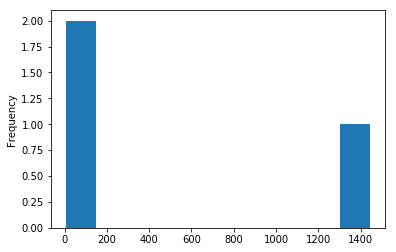

In [85]:
df_analysis['source'].value_counts().plot(kind='hist')